In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [139]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cross_validation import train_test_split

In [140]:
# Read the data
Data = pd.DataFrame(pd.read_csv("../input/seattleWeather_1948-2017.csv"))

# Data Pre-processing

In [141]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
DATE    25551 non-null object
PRCP    25548 non-null float64
TMAX    25551 non-null int64
TMIN    25551 non-null int64
RAIN    25548 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [142]:
#As we can see there ara 3 missing values in PRCP and in RAIN

In [143]:
# Checking where the missing value lies
Data[pd.isnull(Data['RAIN'])]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [144]:
Data[pd.isnull(Data['PRCP'])]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


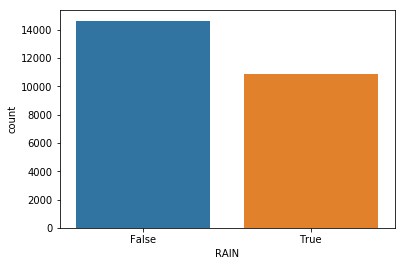

In [145]:
sns.countplot(data = Data,x= 'RAIN')

In [146]:
# As we can see that the False value is more so I will simply replace the missing values 
# with False and for PRCP with the mean of the feature

def RAIN_Insertion(cols):
    RAIN = cols[0]
    if pd.isnull(RAIN):
        return 'False'
    else:
        return RAIN
def PRCP_Insertion(col):
    PRCP = col[0]
    if pd.isnull(PRCP):
        return Data['PRCP'].mean()
    else:
        return PRCP

In [147]:
Data['RAIN'] = Data[['RAIN']].apply(RAIN_Insertion,axis=1)
Data['PRCP'] = Data[['PRCP']].apply(PRCP_Insertion,axis=1)

In [148]:
# As we can see the missing values have been replaced
Data[pd.isnull(Data['RAIN'])]

,DATE,PRCP,TMAX,TMIN,RAIN


In [149]:
Data[pd.isnull(Data['PRCP'])]

,DATE,PRCP,TMAX,TMIN,RAIN


In [150]:
# The length of rows for all column is same now
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
DATE    25551 non-null object
PRCP    25551 non-null float64
TMAX    25551 non-null int64
TMIN    25551 non-null int64
RAIN    25551 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


# Exploratory Data Analysis

Text(0.5,1,'Precipitation vs Minimum Temperature')

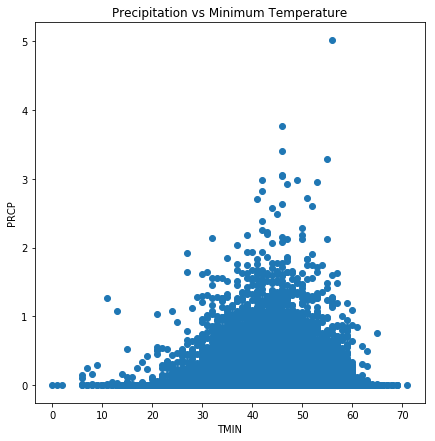

In [151]:
plt.figure(figsize = (7,7))
plt.scatter(x = 'TMIN', y = 'PRCP',data = Data)
plt.xlabel('TMIN')
plt.ylabel('PRCP')
plt.title('Precipitation vs Minimum Temperature')

Text(0.5,1,'Precipitation vs Maximum Temperature')

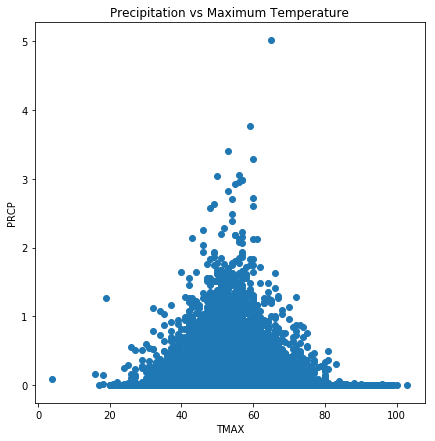

In [152]:
plt.figure(figsize = (7,7))
plt.scatter(x = 'TMAX', y='PRCP', data = Data)
plt.xlabel('TMAX')
plt.ylabel('PRCP')
plt.title('Precipitation vs Maximum Temperature')

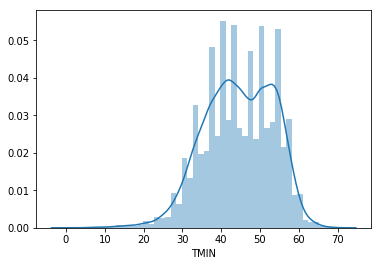

In [153]:
sns.distplot(Data['TMIN'])

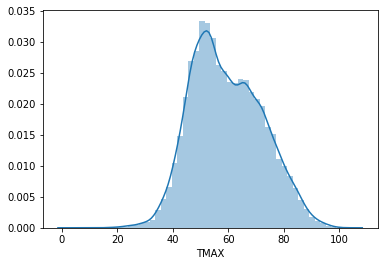

In [154]:
sns.distplot(Data['TMAX'])

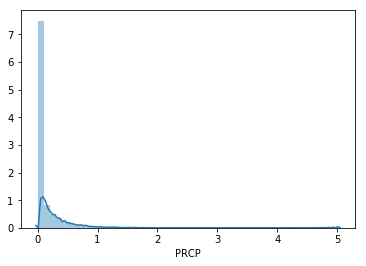

In [155]:
sns.distplot(Data['PRCP'])

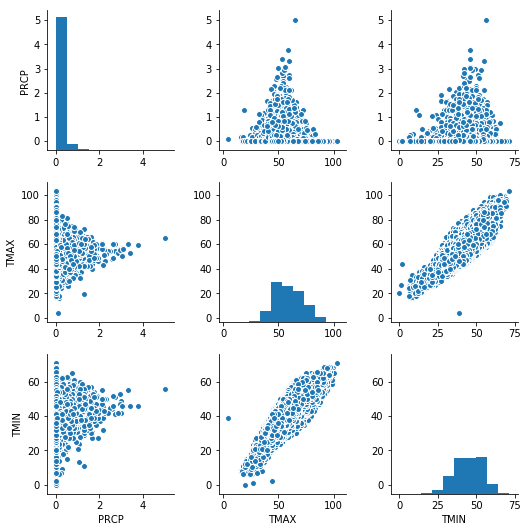

In [156]:
sns.pairplot(data = Data)

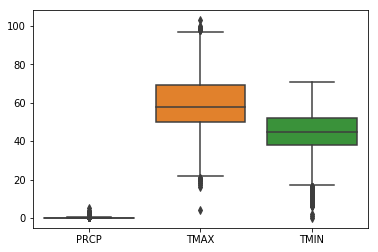

In [157]:
sns.boxplot(data = Data)

In [158]:
z = 2.0
Mean_Tmax = Data["TMAX"].mean()
Std_Tmax = Data["TMAX"].std()
Mean_Tmin = Data["TMIN"].mean()
Std_Tmin = Data["TMIN"].std()
Mean_Prcp = Data["PRCP"].mean()
Std_Prcp = Data["PRCP"].std()
LowTmax = Mean_Tmax - z * Std_Tmax
HighTmax= Mean_Tmax + z * Std_Tmax
LowTmin = Mean_Tmin - z * Std_Tmin
HighTmin = Mean_Tmin + z * Std_Tmin
LowPrcp = Mean_Prcp - z * Std_Prcp
HighPrcp = Mean_Prcp + z * Std_Prcp

In [159]:
# As we can see there are outliers in the data
Data = Data.drop(Data[(Data['TMIN']>HighTmin)| (Data['TMIN']<LowTmin)].index)
Data = Data.drop(Data[(Data['TMAX']>HighTmax) | (Data['TMAX']<LowTmax)].index)
Data = Data.drop(Data[(Data['PRCP']>HighPrcp) | (Data['PRCP']<LowPrcp)].index)

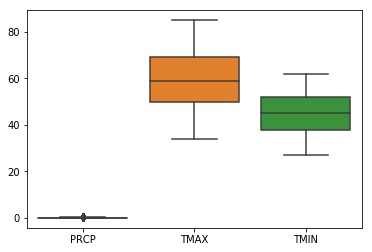

In [160]:
sns.boxplot(data=Data)

In [161]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23170 entries, 0 to 25550
Data columns (total 5 columns):
DATE    23170 non-null object
PRCP    23170 non-null float64
TMAX    23170 non-null int64
TMIN    23170 non-null int64
RAIN    23170 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 1.1+ MB


# Training the model

In [162]:
Labels = Data['RAIN']
Data = Data.drop(['DATE','RAIN'],axis = 1)

In [163]:
# Splitting the data into training and testing
TrainData, TestData, TrainLabels, TestLabels = train_test_split(Data,Labels,test_size = 0.2)

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [165]:
TrainLabels = TrainLabels.astype('str')
TestLabels = TestLabels.astype('str')

In [166]:
lr = LogisticRegression()
lr.fit(TrainData,TrainLabels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Testing the model

In [167]:
prediction=lr.predict(TestData)

In [168]:
print("Confusion Matrix", confusion_matrix(TestLabels,prediction))
print('\n')
print('Classification Report',classification_report(TestLabels,prediction))
print('Accuracy Score',accuracy_score(TestLabels,prediction)*100,'%')

Confusion Matrix [[2722   11]
 [ 316 1585]]


Classification Report              precision    recall  f1-score   support

      False       0.90      1.00      0.94      2733
       True       0.99      0.83      0.91      1901

avg / total       0.94      0.93      0.93      4634

Accuracy Score 92.9434613724644 %
